In [67]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [68]:
# 대륙간 국가 개수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [69]:
# AF의 맥주 소비량 출력
df.groupby('continent')['beer_servings'].sum()['AF']
df[df['continent'] == 'AF']['beer_servings'].sum()

3258

In [70]:
# 대륙별 평균 wine_servings 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [71]:
# 대륙 간 맥주 소비량 출력
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [72]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [73]:
# 상관관계 함수
df[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [74]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [75]:
# 4개 모두 다 상관관계 행렬 구현
cols = ['beer_servings','spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


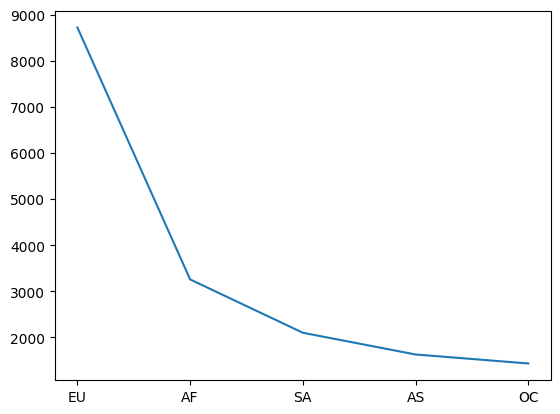

In [76]:
# 대륙별 맥주소비량 평균, 최소, 최대 ,합계
df.groupby('continent').beer_servings.agg(['mean','max','min','sum'])

# 맥주 소비량이 가장 높은 대륙 출력
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

import matplotlib.pyplot as plt
plt.plot(x,y)



In [77]:
# AF, EU 맥주 소비량 차이
df.groupby('continent')['beer_servings'].sum()[['AF','EU']]
beer_AF = df[df['continent']=='AF']['beer_servings'].sum()
beer_EU = df[df['continent']=='EU']['beer_servings'].sum()
beer_AF - beer_EU

-5462

In [78]:
# 컬럼의 모든 술의 총량 출력
df['total_servings'] = df['beer_servings']+ df['wine_servings'] + df['spirit_servings']
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 20 artists>

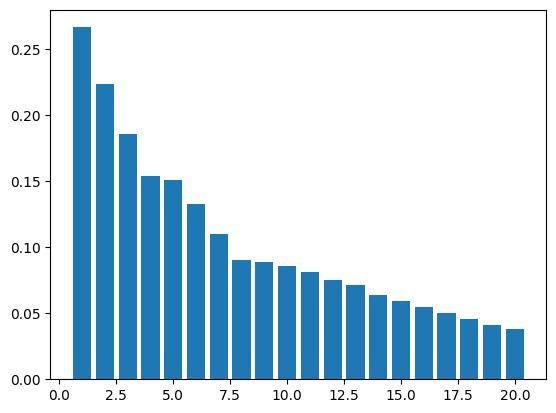

In [97]:
# 술 소비량 대비 알콜 비율
df['total_litres_of_pure_alcohol']/df['total_servings']

# 국가 alcohol_rate별로 역순으로 정렬
# alcohol_rate 컬럼 추가해서 정렬
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']

df.sort_values('alcohol_rate',ascending=False).head(20)[['country','alcohol_rate']]

# 막대 그래프로 그리기
i_list = [i+1 for i in range(20)]
# x = df.sort_values('alcohol_rate',ascending=False).head(20)['country']
x = i_list
y = df.sort_values('alcohol_rate',ascending=False).head(20)['alcohol_rate']

plt.bar(x,y)